# Project Ringbauer 2025 onto PCA
Idea: Find Greek samples to extract and test in IBD run

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
    
if socket_name.startswith("bionc") or socket_name.startswith("hpc"):
    print("Leipzig Cluster detected!")
    path = "/mnt/archgen/users/hringbauer/git/projectPCA/"   
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
     
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")
print(sys.version_info)

#from projectPCA.eigenstrat_funcs import load_genos_autoeager, update_values
from projectPCA.run import project_eigenstrat

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

Leipzig Cluster detected!
/mnt/archgen/users/hringbauer/git/projectPCA
CPU Count: 128
sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)


### Load Standard PCA background

Eigenstrat packed: False
3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 143528/531927 fixed SNPs.


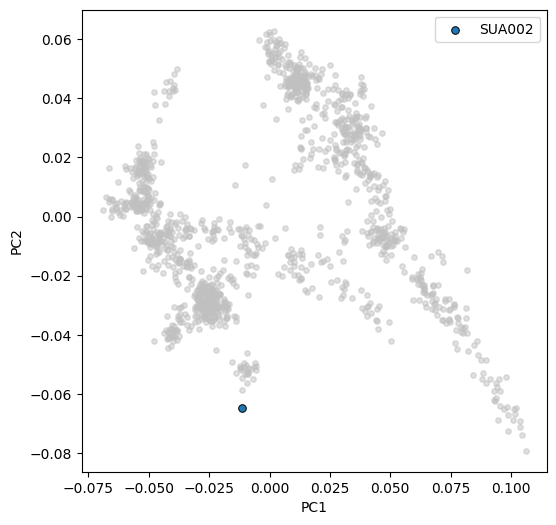

CPU times: user 7.25 s, sys: 778 ms, total: 8.03 s
Wall time: 8.06 s


,pc1,pc2,#SNP,iid
0,-0.011584,-0.06484,334433,SUA002


In [2]:
%%time
project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double",
                   pca="HO", es_type="default")

### Pre-Load SNP dataframe + Autoeager

In [3]:
from projectPCA.get_proj_files import get_projection_files

In [4]:
%%time
df_snp = pd.read_csv("/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double.snp", header=None,
                     sep="\t", engine="python")
df_snp.columns = ["snp", "chr", "map",
                  "pos", "ref", "alt"]  # Set the Columns

CPU times: user 3.87 s, sys: 263 ms, total: 4.13 s
Wall time: 4.12 s


In [5]:
%%time
pf = get_projection_files("HO") # Load the pre-computed PC Object
dfw = pf.get_snp_weights()
df_bgrd_pcs = pf.get_projections_ref()

CPU times: user 306 ms, sys: 6.07 ms, total: 312 ms
Wall time: 326 ms


3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 143528/531927 fixed SNPs.


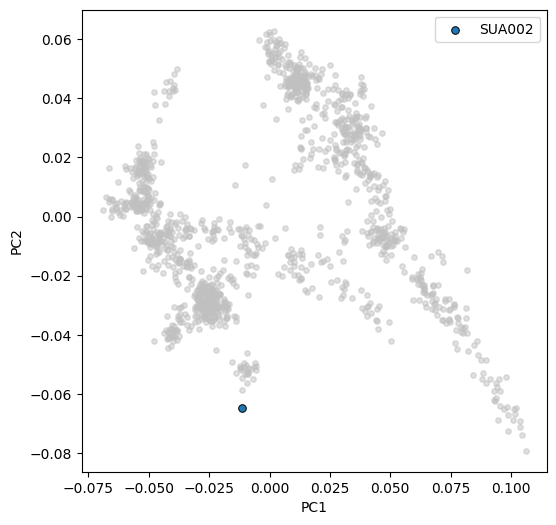

CPU times: user 1.01 s, sys: 76.4 ms, total: 1.09 s
Wall time: 1.1 s


,pc1,pc2,#SNP,iid
0,-0.011584,-0.06484,334433,SUA002


In [7]:
%%time
project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double",
                   df_snp=df_snp, dfw=dfw, df_bgrd_pcs=df_bgrd_pcs,
                   es_type="autoeager")

# Test Ringbauer 2025 Punic eigenstrat PCA

Eigenstrat packed: True
3 Eigenstrat Files with 208 Individuals and 1207104 SNPs
Filtering 130447/518388 fixed SNPs.


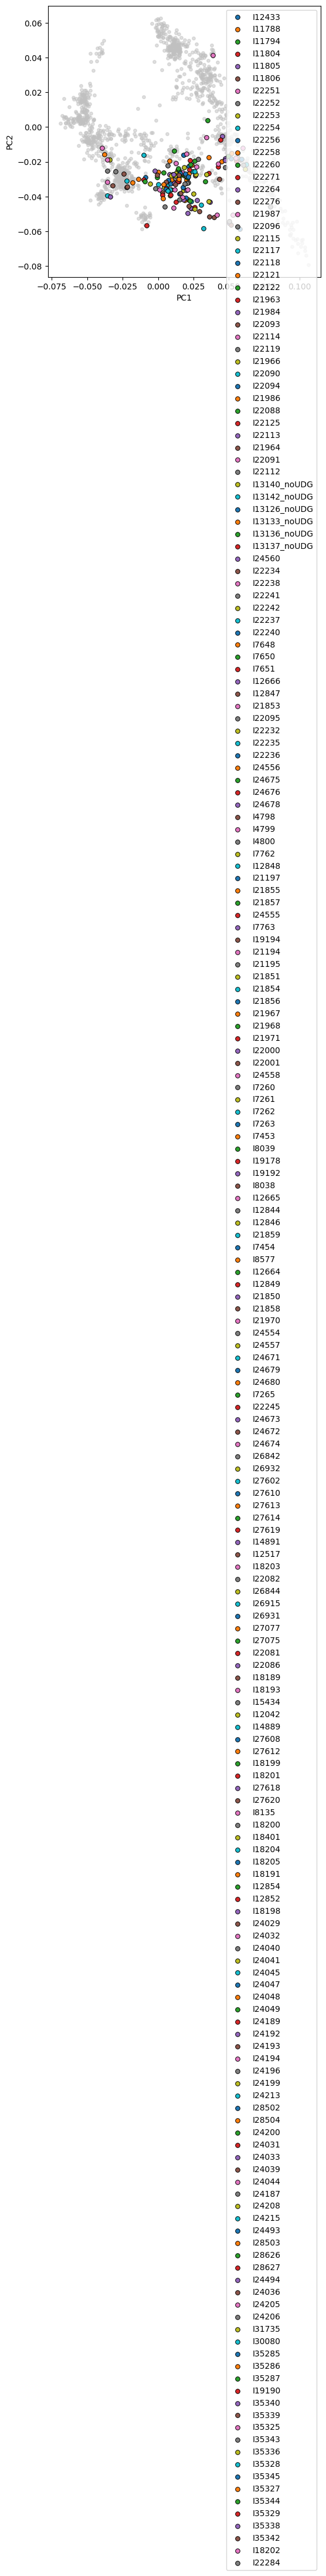

CPU times: user 15.8 s, sys: 2.95 s, total: 18.8 s
Wall time: 18.9 s


,pc1,pc2,#SNP,iid
0,0.057749,-0.058852,366473,I12433
1,0.051939,-0.014927,125539,I11788
2,0.056589,-0.015063,260909,I11794
3,0.055049,-0.019558,50517,I11804
4,0.047240,-0.018262,92209,I11805
...,...,...,...,...
203,0.009070,-0.038929,17379,I35329
204,0.011131,-0.027245,304982,I35338
205,0.014760,-0.027625,122284,I35342
206,0.019949,-0.015306,44417,I18202


In [2]:
%%time
project_eigenstrat(es_path="/mnt/archgen/users/hringbauer/data/ringbauer2025_es/punic208.v54.3_1240k",
                   es_type="default")

Eigenstrat packed: True
3 Eigenstrat Files with 208 Individuals and 1207104 SNPs
Filtering 130447/518388 fixed SNPs.


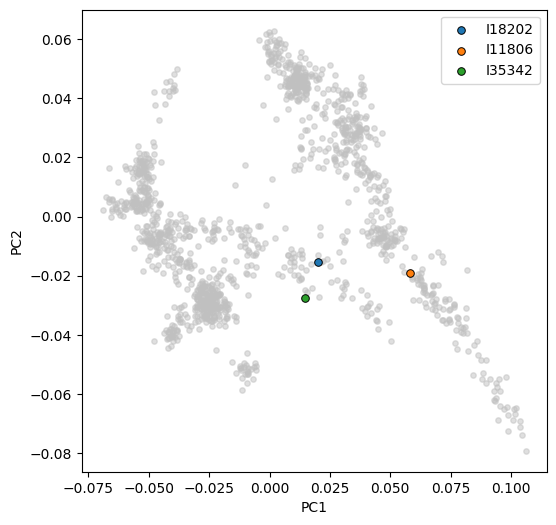

In [5]:
df_out = project_eigenstrat(es_path="/mnt/archgen/users/hringbauer/data/ringbauer2025_es/punic208.v54.3_1240k",
                            iids = ["I18202", "I11806","I35342"],
                            es_type="default")

In [6]:
df_out

,pc1,pc2,#SNP,iid
0,0.019949,-0.015306,44417,I18202
1,0.057955,-0.018961,47954,I11806
2,0.014760,-0.027625,122284,I35342


# Area 51

### Test Speed of Loading

In [ ]:
from projectPCA.loadEigenstrat import get_eigenstrat_object # Load eigenstrat

In [10]:
%%time

es = get_eigenstrat_object("/mnt/archgen/users/hringbauer/data/ringbauer2025_es/punic208.v54.3_1240k", mode="default")

Eigenstrat packed: True
3 Eigenstrat Files with 208 Individuals and 1207104 SNPs
CPU times: user 6.44 s, sys: 127 ms, total: 6.57 s
Wall time: 6.54 s


In [11]:
%%time
g = es.get_geno_iid(iid="I12433")
g

CPU times: user 39.2 ms, sys: 18.1 ms, total: 57.3 ms
Wall time: 56.5 ms


array([nan,  0., nan, ..., nan, nan,  0.], shape=(1207104,), dtype=float16)

In [12]:
pd.value_counts(g)

/tmp/ipykernel_2889876/4028245601.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(g)


2.0    533682
0.0    230299
Name: count, dtype: int64